# File Path

In [9]:
test_1 = "../results/baseline/test_1/training_metrics.json"
test_2 = "../results/baseline/test_2/training_metrics.json"
test_3 = "../results/baseline/test_3/training_metrics.json"
test_4 = "../results/baseline/test_4/training_metrics.json"

# Test 1


Processing Loss Comparisons

Generating plot for 5-epoch experiments...


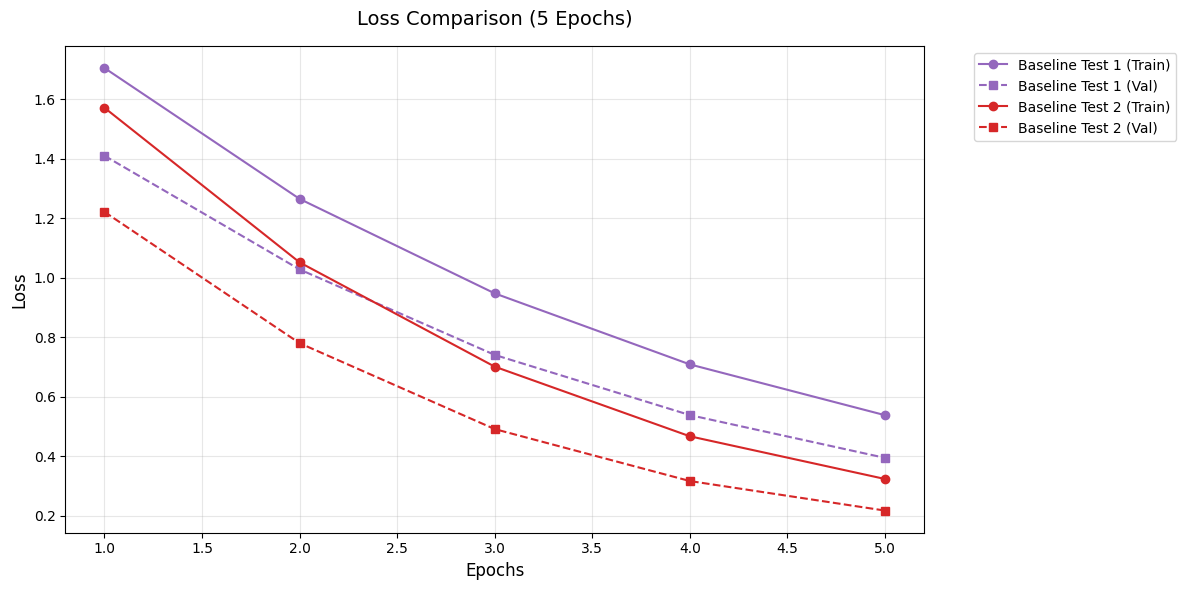


Generating plot for 3-epoch experiments...


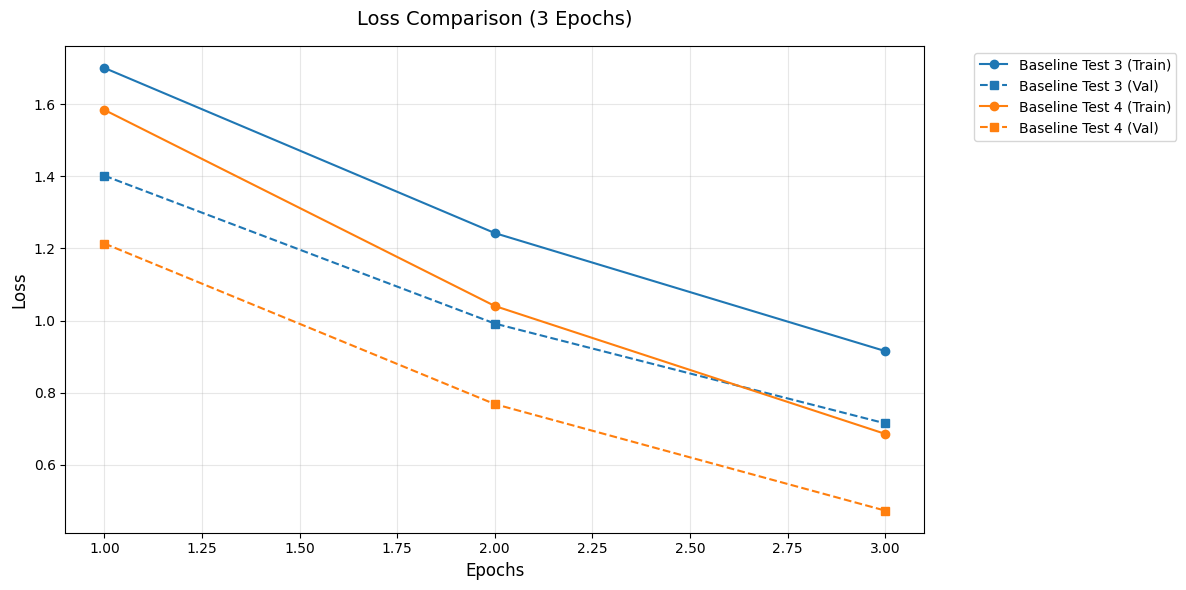


Loss Comparison Table
+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+
| Test Name            | Epochs               | Final Loss (Train)   | Final Loss (Val)     | Best Loss (Train)    | Best Loss (Val)      |
+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+
| Baseline Test 1      | 5                    | 0.5377               | 0.3941               | 1.7059               | 1.4106               |
| Baseline Test 2      | 5                    | 0.3231               | 0.2168               | 1.5721               | 1.2217               |
+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+
| Baseline Test 3      | 3                    | 0.9155               | 0.7150               | 1.7004               | 1.4017              

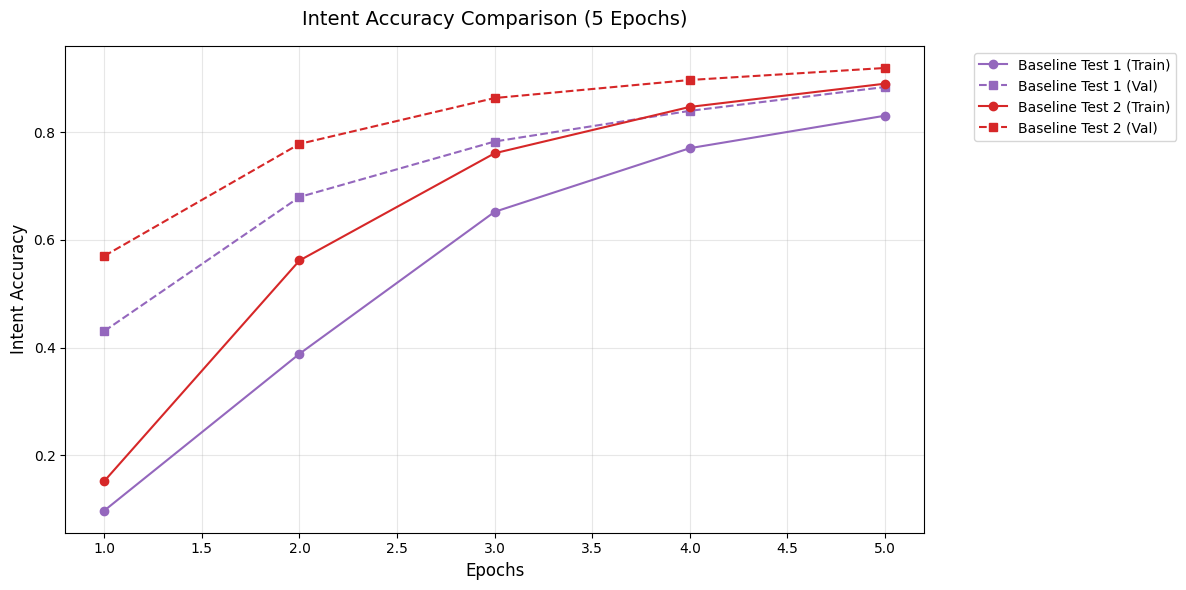


Generating plot for 3-epoch experiments...


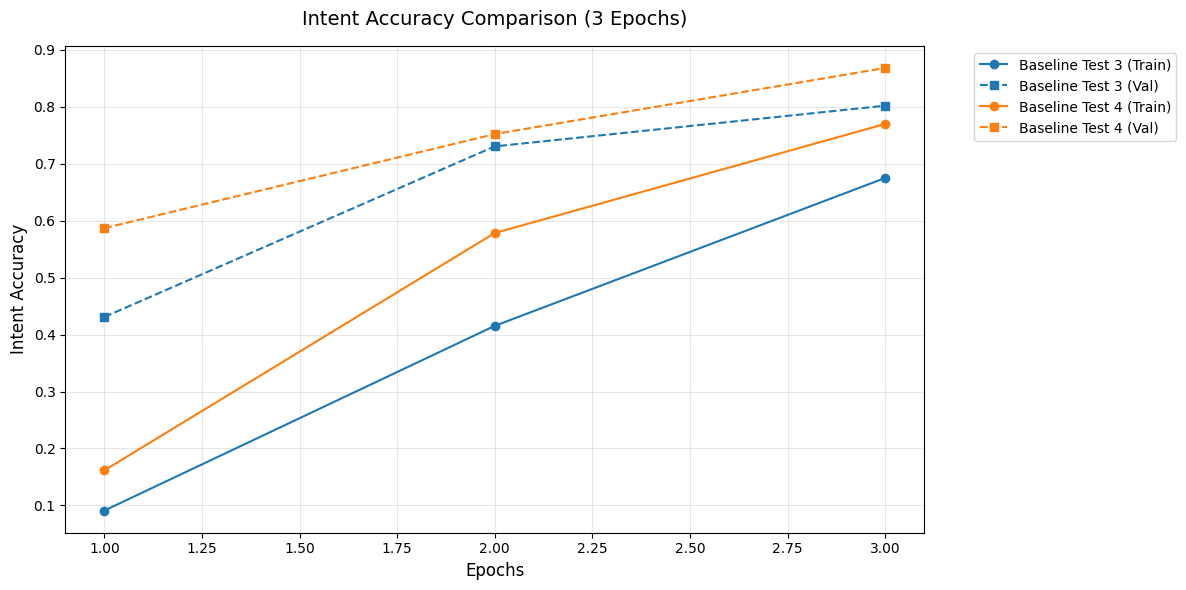


Intent Accuracy Comparison Table
+----------------------+----------------------+-------------------------------+-----------------------------+------------------------------+----------------------------+
| Test Name            | Epochs               | Final Intent Accuracy (Train) | Final Intent Accuracy (Val) | Best Intent Accuracy (Train) | Best Intent Accuracy (Val) |
+----------------------+----------------------+-------------------------------+-----------------------------+------------------------------+----------------------------+
| Baseline Test 1      | 5                    | 0.8306                        | 0.8839                      | 0.8306                       | 0.8839                     |
| Baseline Test 2      | 5                    | 0.8900                        | 0.9192                      | 0.8900                       | 0.9192                     |
+----------------------+----------------------+-------------------------------+-----------------------------+-------

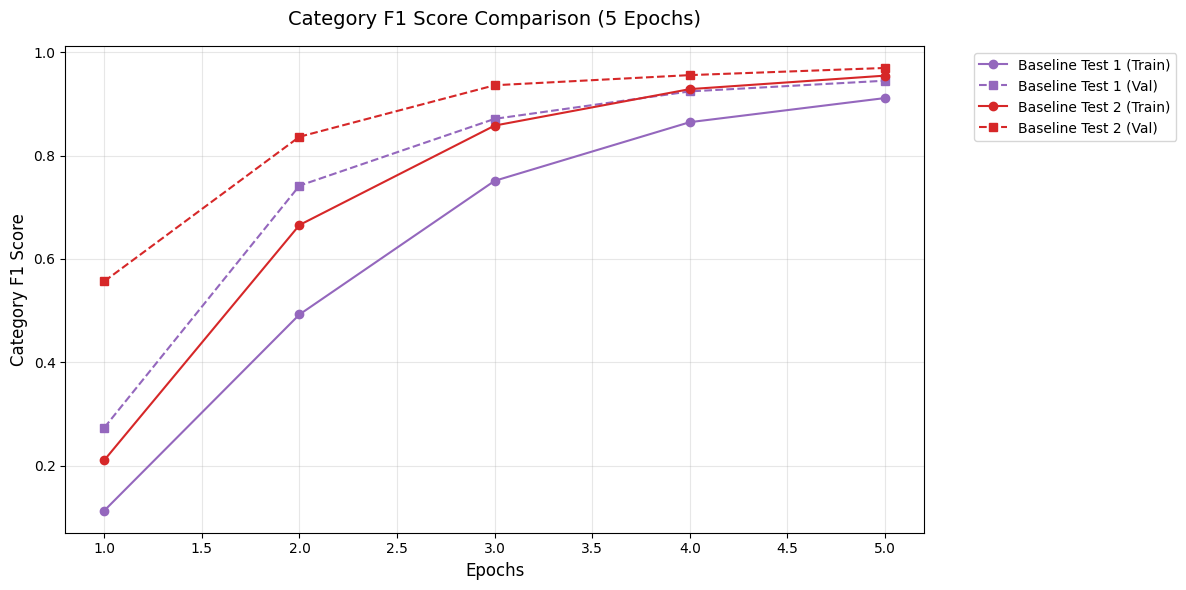


Generating plot for 3-epoch experiments...


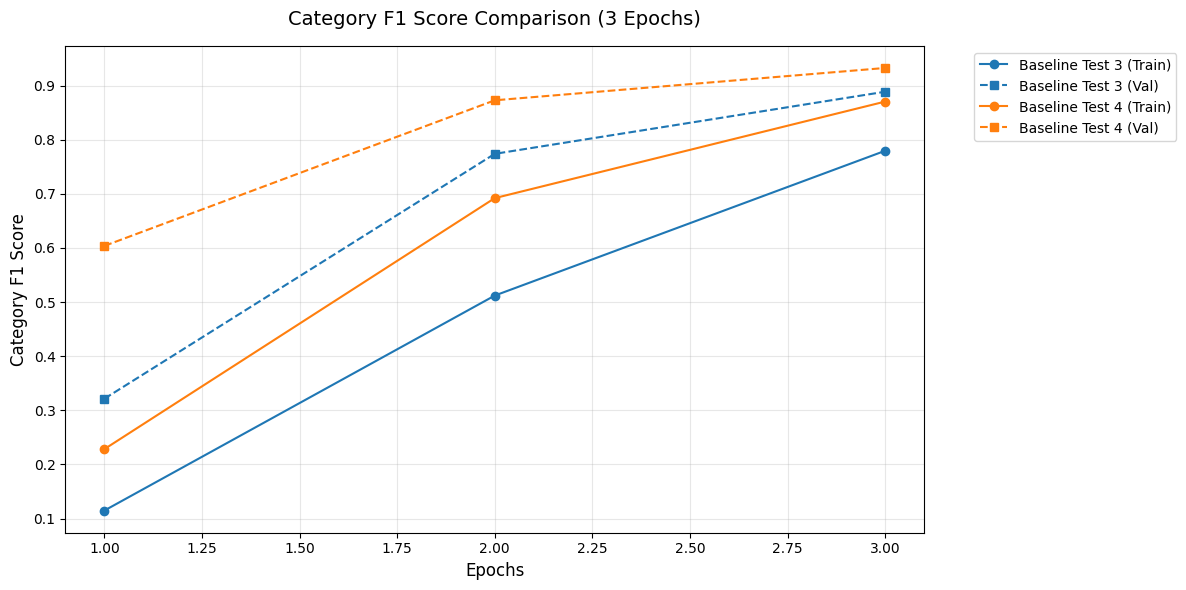


Category F1 Score Comparison Table
+----------------------+----------------------+---------------------------------+-------------------------------+--------------------------------+------------------------------+
| Test Name            | Epochs               | Final Category F1 Score (Train) | Final Category F1 Score (Val) | Best Category F1 Score (Train) | Best Category F1 Score (Val) |
+----------------------+----------------------+---------------------------------+-------------------------------+--------------------------------+------------------------------+
| Baseline Test 1      | 5                    | 0.9113                          | 0.9449                        | 0.9113                         | 0.9449                       |
| Baseline Test 2      | 5                    | 0.9547                          | 0.9695                        | 0.9547                         | 0.9695                       |
+----------------------+----------------------+---------------------------

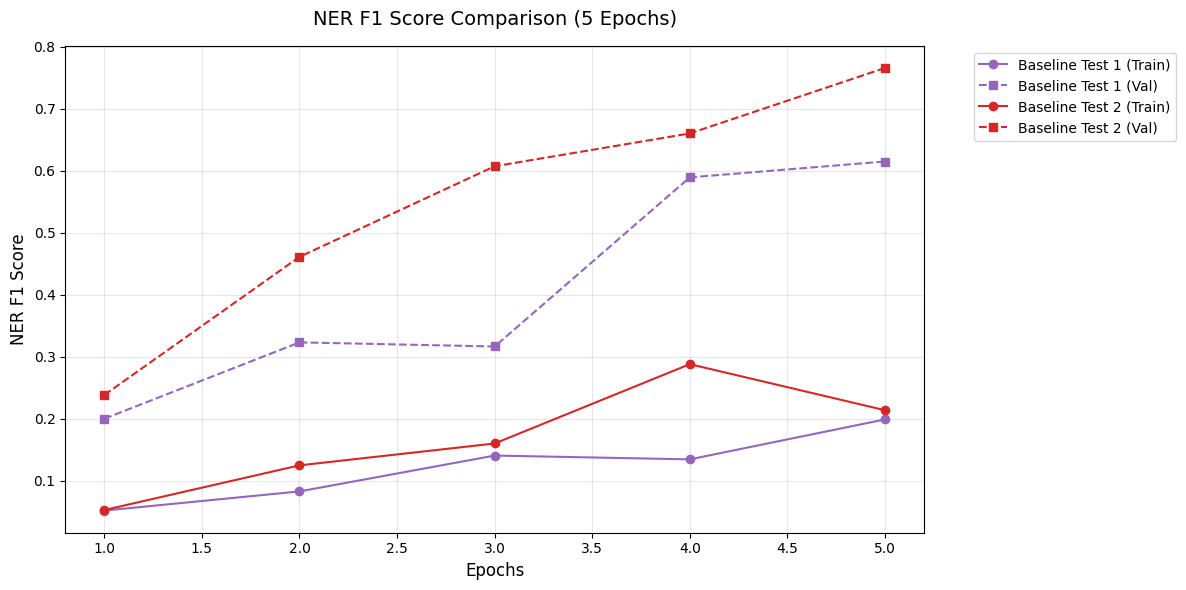


Generating plot for 3-epoch experiments...


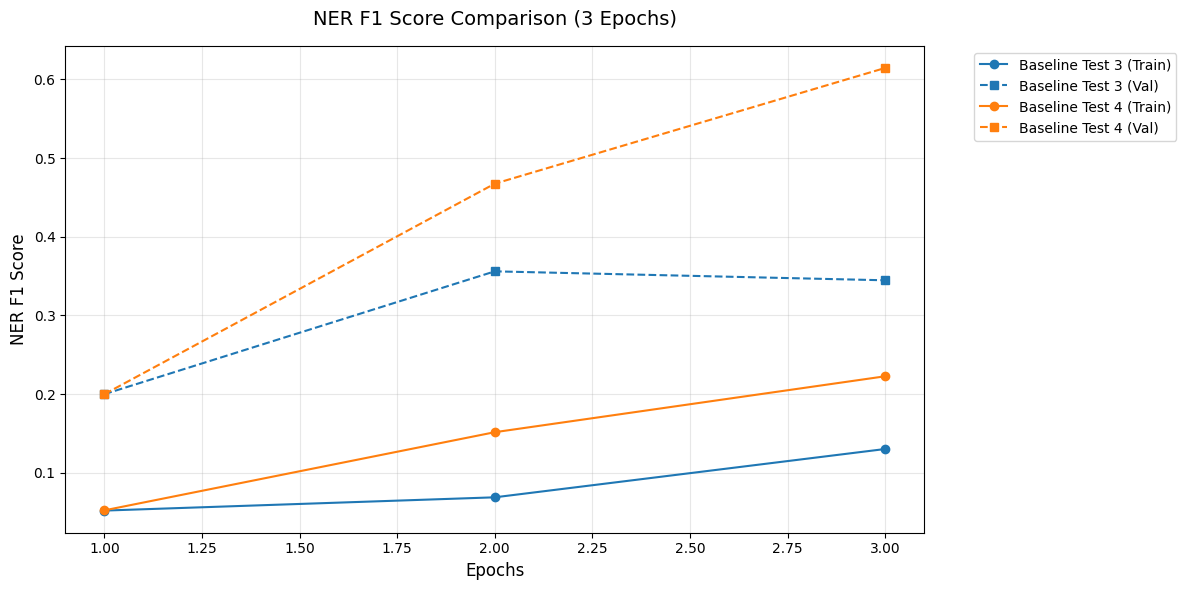


NER F1 Score Comparison Table
+----------------------+----------------------+----------------------------+--------------------------+---------------------------+-------------------------+
| Test Name            | Epochs               | Final NER F1 Score (Train) | Final NER F1 Score (Val) | Best NER F1 Score (Train) | Best NER F1 Score (Val) |
+----------------------+----------------------+----------------------------+--------------------------+---------------------------+-------------------------+
| Baseline Test 1      | 5                    | 0.1988                     | 0.6146                   | 0.1988                    | 0.6146                  |
| Baseline Test 2      | 5                    | 0.2136                     | 0.7654                   | 0.2879                    | 0.7654                  |
+----------------------+----------------------+----------------------------+--------------------------+---------------------------+-------------------------+
| Baseline Test 3    

In [13]:
import json
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# File paths with descriptive names
PATHS = {
    'Baseline Test 1': "../results/baseline/test_1/training_metrics.json",
    'Baseline Test 2': "../results/baseline/test_2/training_metrics.json",
    'Baseline Test 3': "../results/baseline/test_3/training_metrics.json",
    'Baseline Test 4': "../results/baseline/test_4/training_metrics.json"
}

# Current timestamp and username
TIMESTAMP = "2025-03-08 07:00:02"
USERNAME = "reagan02"

# Professional color scheme
COLORS = {
    3: ['#1f77b4', '#ff7f0e', '#2ca02c'],  # Colors for 3-epoch experiments
    5: ['#9467bd', '#d62728', '#8c564b', '#e377c2', '#7f7f7f']  # Colors for 5-epoch experiments
}

def load_json_file(filename):
    try:
        with open(filename, 'r') as f:
            return json.load(f)
    except FileNotFoundError:
        print(f"Warning: File not found: {filename}")
        return None

# Load experiments and group by number of epochs
experiments = {}
for name, path in PATHS.items():
    data = load_json_file(path)
    if data:
        experiments[name] = data

def plot_metric_by_epoch_group(metric_name, train_key, val_key, epoch_group_data, num_epochs):
    plt.figure(figsize=(12, 6))
    
    for idx, (name, data) in enumerate(epoch_group_data.items()):
        epochs = range(1, len(data[train_key]) + 1)
        color = COLORS[num_epochs][idx % len(COLORS[num_epochs])]
        
        # Plot training
        plt.plot(epochs, data[train_key], 
                color=color,
                marker='o',
                linestyle='-',
                label=f'{name} (Train)',
                markersize=6,
                markevery=max(1, len(epochs)//10))
        
        # Plot validation
        plt.plot(epochs, data[val_key], 
                color=color,
                marker='s',
                linestyle='--',
                label=f'{name} (Val)',
                markersize=6,
                markevery=max(1, len(epochs)//10))
    
    plt.title(f'{metric_name} Comparison ({num_epochs} Epochs)', fontsize=14, pad=15)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel(metric_name, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # save_name = f'baseline_{metric_name.lower().replace(" ", "_")}_{num_epochs}_epochs.png'
    # plt.savefig(save_name, dpi=300, bbox_inches='tight')
    plt.show()

def create_comparison_table(metric_name, train_key, val_key):
    # Group experiments by number of epochs
    epoch_groups = {}
    for name, data in experiments.items():
        num_epochs = len(data[train_key])
        if num_epochs not in epoch_groups:
            epoch_groups[num_epochs] = {}
        epoch_groups[num_epochs][name] = data
    
    # Create table data
    table_data = []
    headers = ['Test Name', 'Epochs', f'Final {metric_name} (Train)', f'Final {metric_name} (Val)',
               f'Best {metric_name} (Train)', f'Best {metric_name} (Val)']
    
    for num_epochs, group_data in epoch_groups.items():
        # Add a separator row
        if table_data:
            table_data.append(['-'*20 for _ in headers])
        
        for name, data in group_data.items():
            row = [
                name,
                str(num_epochs),
                f"{data[train_key][-1]:.4f}",
                f"{data[val_key][-1]:.4f}",
                f"{max(data[train_key]):.4f}",
                f"{max(data[val_key]):.4f}"
            ]
            table_data.append(row)
    
    return headers, table_data

def print_formatted_table(headers, table_data, metric_name):
    # Calculate column widths
    col_widths = [max(len(str(row[i])) for row in [headers] + table_data) for i in range(len(headers))]
    
    # Print separator line
    separator = '+' + '+'.join('-' * (width + 2) for width in col_widths) + '+'
    
    # Print title
    print(f"\n{metric_name} Comparison Table")
    print('=' * (len(separator)))
    
    # Print headers
    print(separator)
    header_row = '|'
    for header, width in zip(headers, col_widths):
        header_row += f' {header:<{width}} |'
    print(header_row)
    print(separator)
    
    # Print data
    for row in table_data:
        if '-' in row[0]:  # Separator row
            print(separator)
            continue
        
        data_row = '|'
        for item, width in zip(row, col_widths):
            data_row += f' {item:<{width}} |'
        print(data_row)
    
    print(separator)
    print(f"\nGenerated by: {USERNAME}")
    print(f"Date: {TIMESTAMP}\n")

# Metrics to plot
metrics_to_plot = [
    ('Loss', 'train_loss', 'val_loss'),
    ('Intent Accuracy', 'train_intent_acc', 'val_intent_acc'),
    ('Category F1 Score', 'train_category_f1', 'val_category_f1'),
    ('NER F1 Score', 'train_ner_f1', 'val_ner_f1')
]

# Process each metric
for metric_name, train_key, val_key in metrics_to_plot:
    print(f"\n{'='*80}")
    print(f"Processing {metric_name} Comparisons")
    print(f"{'='*80}")
    
    # Group experiments by number of epochs
    epoch_groups = {}
    for name, data in experiments.items():
        num_epochs = len(data[train_key])
        if num_epochs not in epoch_groups:
            epoch_groups[num_epochs] = {}
        epoch_groups[num_epochs][name] = data
    
    # Plot separate graphs for each epoch group
    for num_epochs, group_data in epoch_groups.items():
        print(f"\nGenerating plot for {num_epochs}-epoch experiments...")
        plot_metric_by_epoch_group(metric_name, train_key, val_key, group_data, num_epochs)
    
    # Create and print table
    headers, table_data = create_comparison_table(metric_name, train_key, val_key)
    print_formatted_table(headers, table_data, metric_name)

print("\nProcessing complete!")
print(f"{'='*80}")

In [21]:
# ... (previous code remains the same)

def create_overall_comparison_table_plot():
    plt.figure(figsize=(20, len(experiments) + 4))
    
    # Prepare data for table
    headers = ['Test Name', 'Epochs']
    metric_headers = []
    for metric_name, _, _ in metrics_to_plot:
        metric_headers.extend([
            f'{metric_name}\nTrain',
            f'{metric_name}\nVal'
        ])
    headers.extend(metric_headers)
    
    # Prepare table data
    table_data = []
    epoch_groups = {}
    
    # Group experiments by epochs
    for name, data in experiments.items():
        num_epochs = len(data['train_loss'])
        if num_epochs not in epoch_groups:
            epoch_groups[num_epochs] = {}
        epoch_groups[num_epochs][name] = data
    
    # Create table data with separators
    for num_epochs in sorted(epoch_groups.keys()):
        if table_data:  # Add separator between epoch groups
            table_data.append(['—' * len(str(cell)) for cell in headers])
            
        for name, data in epoch_groups[num_epochs].items():
            row = [name, str(num_epochs)]
            for _, train_key, val_key in metrics_to_plot:
                row.extend([
                    f"{data[train_key][-1]:.4f}",
                    f"{data[val_key][-1]:.4f}"
                ])
            table_data.append(row)
  

def print_overall_comparison():
    # Print version of the table (as before)
    print(f"\n{'='*120}")
    print(f"OVERALL COMPARISON TABLE")
    print(f"{'='*120}")
    
    headers = ['Test Name', 'Epochs']
    metric_headers = []
    for metric_name, _, _ in metrics_to_plot:
        metric_headers.extend([
            f'{metric_name} Train',
            f'{metric_name} Val'
        ])
    headers.extend(metric_headers)
    
    # Calculate column widths
    col_widths = [max(len(header), 15) for header in headers]
    separator = '+' + '+'.join('-' * (width + 2) for width in col_widths) + '+'
    
    print(separator)
    header_row = '|'
    for header, width in zip(headers, col_widths):
        header_row += f' {header:<{width}} |'
    print(header_row)
    print(separator)
    
    # Group and print data
    epoch_groups = {}
    for name, data in experiments.items():
        num_epochs = len(data['train_loss'])
        if num_epochs not in epoch_groups:
            epoch_groups[num_epochs] = {}
        epoch_groups[num_epochs][name] = data
    
    first_group = True
    for num_epochs in sorted(epoch_groups.keys()):
        if not first_group:
            print(separator)
        first_group = False
        
        for name, data in epoch_groups[num_epochs].items():
            row_data = [name, str(num_epochs)]
            for _, train_key, val_key in metrics_to_plot:
                row_data.extend([
                    f"{data[train_key][-1]:.4f}",
                    f"{data[val_key][-1]:.4f}"
                ])
            
            row = '|'
            for item, width in zip(row_data, col_widths):
                row += f' {item:<{width}} |'
            print(row)
    
    print(separator)
    print(f"\nGenerated by: {USERNAME}")
    print(f"Date: {TIMESTAMP}")

# Add these lines at the end of your main processing loop:
print("\nGenerating overall comparison table and plot...")
create_overall_comparison_table_plot()
print_overall_comparison()


Generating overall comparison table and plot...

OVERALL COMPARISON TABLE
+-----------------+-----------------+-----------------+-----------------+-----------------------+---------------------+-------------------------+-----------------------+--------------------+------------------+
| Test Name       | Epochs          | Loss Train      | Loss Val        | Intent Accuracy Train | Intent Accuracy Val | Category F1 Score Train | Category F1 Score Val | NER F1 Score Train | NER F1 Score Val |
+-----------------+-----------------+-----------------+-----------------+-----------------------+---------------------+-------------------------+-----------------------+--------------------+------------------+
| Baseline Test 3 | 3               | 0.9155          | 0.7150          | 0.6750                | 0.8020              | 0.7795                  | 0.8886                | 0.1302             | 0.3447           |
| Baseline Test 4 | 3               | 0.6859          | 0.4731          | 0.7699     

<Figure size 2000x800 with 0 Axes>

Generating baseline test results comparison...

BASELINE TEST RESULTS COMPARISON TABLE
+-----------------+--------+-----------------+-------------+--------+
| Test Name       | Loss   | Intent Accuracy | Category F1 | NER F1 |
+-----------------+--------+-----------------+-------------+--------+
| Baseline Test 1 | 0.3953 | 0.8780          | 0.9567      | 0.6799 |
| Baseline Test 2 | 0.2159 | 0.9193          | 0.9750      | 0.7783 |
| Baseline Test 3 | 0.7159 | 0.8039          | 0.8999      | 0.3617 |
| Baseline Test 4 | 0.4739 | 0.8668          | 0.9408      | 0.6718 |
+-----------------+--------+-----------------+-------------+--------+

Generated by: reagan02
Date: 2025-03-08 07:00:02


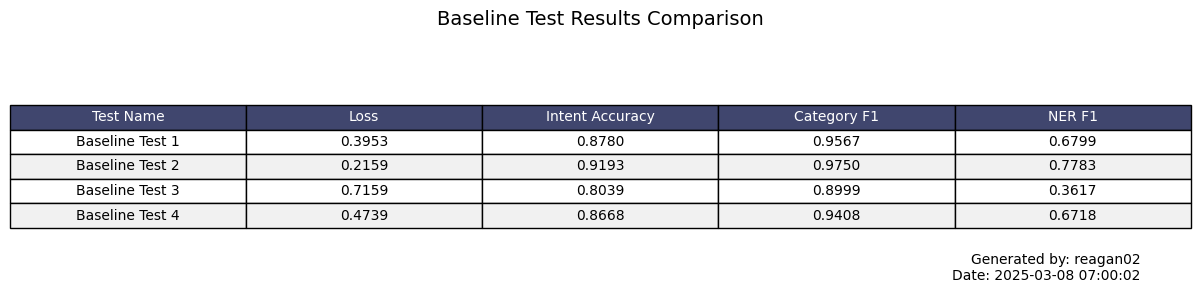


Test results processing complete!


In [27]:
import json
import matplotlib.pyplot as plt
from datetime import datetime

# File paths for test result files
TEST_PATHS = {
    'Baseline Test 1': "../results/baseline/test_1/test_results.json",
    'Baseline Test 2': "../results/baseline/test_2/test_results.json",
    'Baseline Test 3': "../results/baseline/test_3/test_results.json",
    'Baseline Test 4': "../results/baseline/test_4/test_results.json",
}

# Current timestamp and username
TIMESTAMP = "2025-03-08 07:00:02"
USERNAME = "reagan02"

def load_json_file(filename):
    try:
        with open(filename, 'r') as f:
            return json.load(f)
    except FileNotFoundError:
        print(f"Warning: File not found: {filename}")
        return None

# Load test results from files
test_results = {}
for name, path in TEST_PATHS.items():
    data = load_json_file(path)
    if data:
        test_results[name] = data

def create_test_comparison_table():
    if not test_results:
        return ['Test Name', 'Loss', 'Intent Accuracy', 'Category F1', 'NER F1'], []
    
    headers = ['Test Name', 'Loss', 'Intent Accuracy', 'Category F1', 'NER F1']
    table_data = []
    
    for name, data in test_results.items():
        row = [
            name,
            f"{data.get('loss', 'N/A'):.4f}" if isinstance(data.get('loss'), (int, float)) else str(data.get('loss', 'N/A')),
            f"{data.get('intent_accuracy', 'N/A'):.4f}" if isinstance(data.get('intent_accuracy'), (int, float)) else str(data.get('intent_accuracy', 'N/A')),
            f"{data.get('category_f1', 'N/A'):.4f}" if isinstance(data.get('category_f1'), (int, float)) else str(data.get('category_f1', 'N/A')),
            f"{data.get('ner_f1', 'N/A'):.4f}" if isinstance(data.get('ner_f1'), (int, float)) else str(data.get('ner_f1', 'N/A'))
        ]
        table_data.append(row)
    
    return headers, table_data

def print_test_comparison_table(headers, table_data):
    if not table_data:
        print("\nNo test results available to display!")
        return
    
    col_widths = [max(len(str(row[i])) for row in [headers] + table_data) for i in range(len(headers))]
    separator = '+' + '+'.join('-' * (width + 2) for width in col_widths) + '+'
    
    print(f"\n{'='*80}")
    print("BASELINE TEST RESULTS COMPARISON TABLE")
    print(f"{'='*80}")
    print(separator)
    
    header_row = '|' + '|'.join(f' {header:<{width}} ' for header, width in zip(headers, col_widths)) + '|'
    print(header_row)
    print(separator)
    
    for row in table_data:
        data_row = '|' + '|'.join(f' {item:<{width}} ' for item, width in zip(row, col_widths)) + '|'
        print(data_row)
    
    print(separator)
    print(f"\nGenerated by: {USERNAME}")
    print(f"Date: {TIMESTAMP}")

def plot_graphical_table(headers, table_data):
    if not table_data:
        print("No test results available for graphical table!")
        return
    
    fig, ax = plt.subplots(figsize=(12, len(table_data) * 0.5 + 1))
    ax.axis('tight')
    ax.axis('off')
    
    # Create the table
    table = ax.table(cellText=table_data,
                    colLabels=headers,
                    cellLoc='center',
                    loc='center')
    
    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)  # Adjust scale for better readability
    
    # Color header row
    for (row, col), cell in table.get_celld().items():
        if row == 0:
            cell.set_facecolor('#40466e')
            cell.set_text_props(color='white')
        elif row % 2 == 0:
            cell.set_facecolor('#f1f1f1')
    
    plt.title('Baseline Test Results Comparison', fontsize=14, pad=20)
    plt.figtext(0.95, 0.05, f'Generated by: {USERNAME}\nDate: {TIMESTAMP}',
                horizontalalignment='right', fontsize=10)
    plt.tight_layout()
    # plt.savefig('baseline_test_results_table.png', dpi=300, bbox_inches='tight')
    plt.show()

# Main execution
if not TEST_PATHS:
    print("Please add test result file paths to TEST_PATHS dictionary!")
else:
    print("Generating baseline test results comparison...")
    headers, table_data = create_test_comparison_table()
    print_test_comparison_table(headers, table_data)
    plot_graphical_table(headers, table_data)
    print("\nTest results processing complete!")
    print(f"{'='*80}")